In [1]:
import networkx as nx
import pandas as pd

In this notebook, I simply play around with networkx's graphing algorithm functions to explore how they work. This is essentially scrap paper so no markup is here.

In [2]:
data = {
    'Location': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E', 'E', 'F', 'F', 'G', 'G', 'H', 'H', 'D'],
    'Adjacent_Location': ['B', 'C', 'A', 'D', 'B', 'E', 'C', 'F', 'D', 'G', 'E', 'H', 'F', 'H', 'G', 'F', 'E'],
    'Distance': [10, 15, 10, 20, 15, 12, 20, 25, 12, 18, 20, 22, 18, 10, 22, 28, 10]
}

df = pd.DataFrame(data)


In [3]:
df['dist_inv'] = 1 / ( df['Distance'])

In [4]:
G = nx.DiGraph()


In [5]:
for _, row in df.iterrows():
    G.add_edge(row['Location'], row['Adjacent_Location'], weight=row['Distance'])


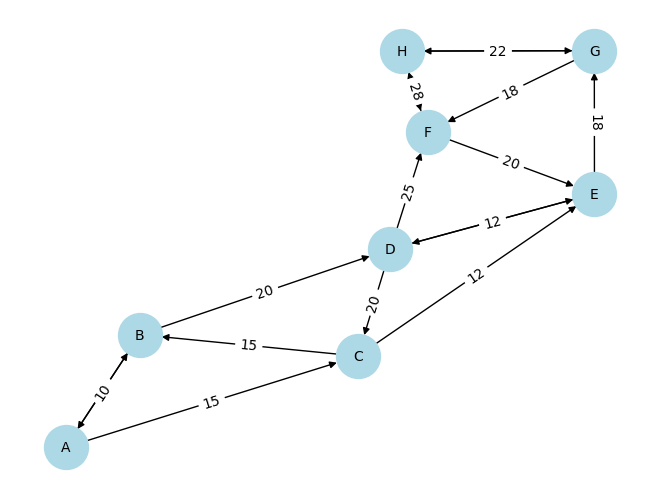

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [7]:
15+12

27

In [8]:
10+20+12

42

In [9]:
print(nx.shortest_path(G, source='A', target='D', weight='weight'))

['A', 'B', 'D']


In [10]:
# Calculate the longest path from A to G
longest_path_A_to_D = nx.single_source_dijkstra_path(G, source='A', weight='weight')
max_distance_A_to_D = nx.single_source_dijkstra_path_length(G, source='A', weight='weight')

print("Longest path from A to G:", longest_path_A_to_D)
print("Longest distance from A to G:", max_distance_A_to_D)

Longest path from A to G: {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'B', 'D'], 'E': ['A', 'C', 'E'], 'G': ['A', 'C', 'E', 'G'], 'F': ['A', 'B', 'D', 'F'], 'H': ['A', 'C', 'E', 'G', 'H']}
Longest distance from A to G: {'A': 0, 'B': 10, 'C': 15, 'E': 27, 'D': 30, 'G': 45, 'F': 55, 'H': 55}


In [11]:
longest_path_A_to_D['D']


['A', 'B', 'D']

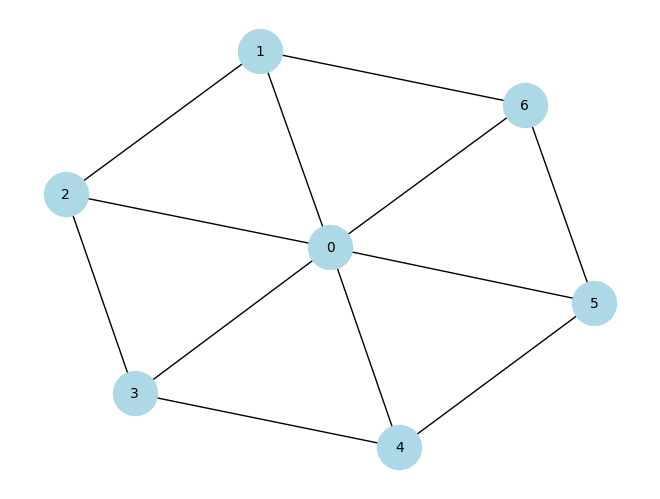

In [12]:
G = nx.wheel_graph(7)
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [13]:
print(nx.shortest_path(G, source=3, target=4))

[3, 4]


In [14]:
data = {
    'Location': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D','D'],
    'Adjacent_Location': ['B', 'C', 'A', 'D', 'B', 'D', 'C', 'A','B'],
    'Distance': [10, 15, 10, 20, 15, 12, 20, 25,36]
}

df = pd.DataFrame(data)

print(df)


  Location Adjacent_Location  Distance
0        A                 B        10
1        A                 C        15
2        B                 A        10
3        B                 D        20
4        C                 B        15
5        C                 D        12
6        D                 C        20
7        D                 A        25
8        D                 B        36


In [15]:
df['one_over_dist'] = 1/df['Distance']

In [16]:
df

,Location,Adjacent_Location,Distance,one_over_dist
0,A,B,10,0.100000
1,A,C,15,0.066667
2,B,A,10,0.100000
3,B,D,20,0.050000
4,C,B,15,0.066667
5,C,D,12,0.083333
6,D,C,20,0.050000
7,D,A,25,0.040000
8,D,B,36,0.027778


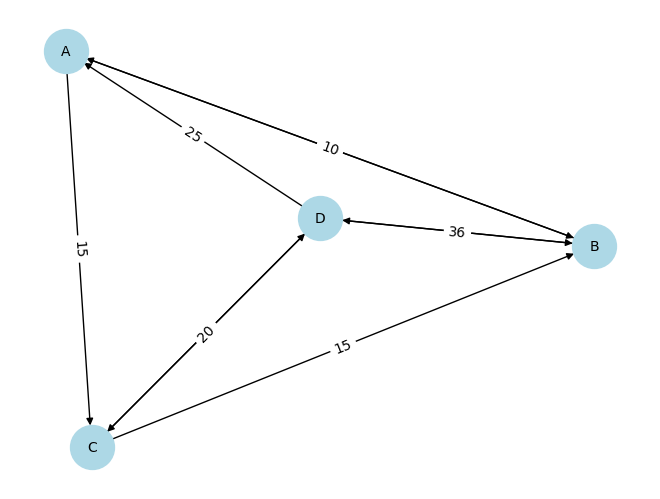

In [17]:
G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(row['Location'], row['Adjacent_Location'], weight=row['Distance'])


import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [18]:
print(nx.shortest_path(G, source='D', target='B', weight='weight'))

['D', 'A', 'B']


Cool! So the way to calculate the longest path by weight is to take the inverse of the weight.

In [19]:
data_new = {
    'Start': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D','D'],
    'End': ['B', 'C', 'A', 'D', 'B', 'D', 'C', 'A','B'],
    'Adjacent': [0, 1, 0, 0, 0, 1, 1, 1,0],
    'Distance': [10, 15, 10, 20, 15, 12, 20, 25,36]
}

df_new = pd.DataFrame(data_new)

df_new

,Start,End,Adjacent,Distance
0,A,B,0,10
1,A,C,1,15
2,B,A,0,10
3,B,D,0,20
4,C,B,0,15
5,C,D,1,12
6,D,C,1,20
7,D,A,1,25
8,D,B,0,36


Okay, wow, so this adds a whole new element -- if a node goes from one node to another node and it ISN'T adjacent, it's weight still needs to be factored in. But that's not a path. It's just extra weight.

Chat GPT answer to this question. Use resource arrays for when certain combinations of nodes are hit. A condition would have to look something like, if answer contains 1 & 2 and 1 is before 2, include [1,2].

In [20]:
import heapq

In [21]:
def custom_dijkstra(graph, source, conditions, additional_costs):
    distance = {node: float('inf') for node in graph.nodes}
    distance[source] = 0
    resource = {node: 0 for node in graph.nodes}
    
    priority_queue = [(0, source)]
    
    while priority_queue:
        dist, current_node = heapq.heappop(priority_queue)
        
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor]['weight']
            new_distance = distance[current_node] + edge_weight
            
            # Check if conditions for additional cost are met
            if (current_node, neighbor) in conditions:
                additional_cost = additional_costs[(current_node, neighbor)]
                new_distance += additional_cost
            
            if new_distance < distance[neighbor]:
                distance[neighbor] = new_distance
                resource[neighbor] = resource[current_node] + additional_cost
                heapq.heappush(priority_queue, (new_distance, neighbor))
    
    return distance, resource

# Create a graph
G = nx.Graph()
G.add_edge('A', 'B', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('A', 'C', weight=3)

# Define conditions and additional costs
conditions = {('A', 'C')}
additional_costs = {('A', 'C'): 3}

# Calculate shortest paths with additional costs
shortest_distances, additional_resource = custom_dijkstra(G, 'A', conditions, additional_costs)

print("Shortest Distances:", shortest_distances)
print("Additional Resource:", additional_resource)


UnboundLocalError: local variable 'additional_cost' referenced before assignment

In [ ]:
data = {
    'Location': [1,2,3,1,5,6,2,3,4,5,6,4],
    'Adjacent_Location': [2,3,4,5,6,4,1,2,3,1,5,6],
    'Distance': [10, 10, 10, 5, 5, 5,5, 5, 5, 10, 10, 10]
}

df2 = pd.DataFrame(data)


In [ ]:
data = {
    'Location': [1,2,3,1,5,6],
    'Adjacent_Location': [2,3,4,5,6,4],
    'Distance': [10, 10, 10, 5, 5, 5]
}

df2 = pd.DataFrame(data)


In [ ]:
df2

,Location,Adjacent_Location,Distance
0,1,2,10
1,2,3,10
2,3,4,10
3,1,5,5
4,5,6,5
5,6,4,5
6,2,1,5
7,3,2,5
8,4,3,5
9,5,1,10


In [ ]:
df2['dist_inv'] = 1/(df2['Distance']+1)

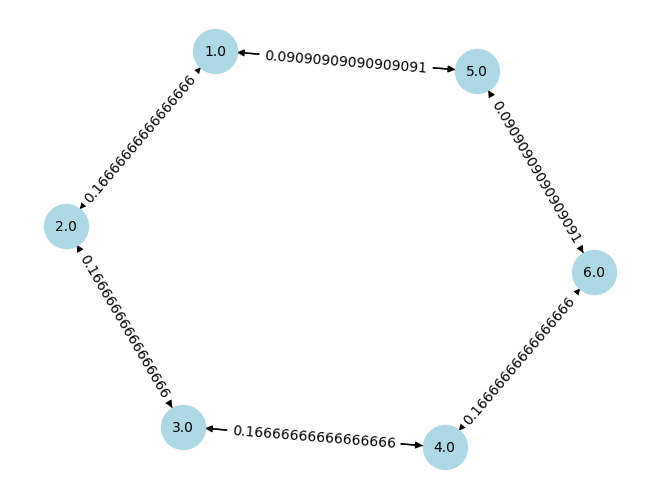

In [ ]:
H = nx.DiGraph()

for _, row in df2.iterrows():
    H.add_edge(row['Location'], row['Adjacent_Location'], weight=row['dist_inv'])


import matplotlib.pyplot as plt

pos = nx.spring_layout(H)  # positions for all nodes

nx.draw(H, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=labels)


plt.show()


In [ ]:
print(nx.shortest_path(H, source=1, target=4, weight='weight'))

[1, 2.0, 3.0, 4]


In [ ]:
df3 = pd.DataFrame(data)
df3

,Location,Adjacent_Location,Distance
0,1,2,10
1,2,3,10
2,3,4,10
3,1,5,5
4,5,6,5
5,6,4,5
6,2,1,5
7,3,2,5
8,4,3,5
9,5,1,10


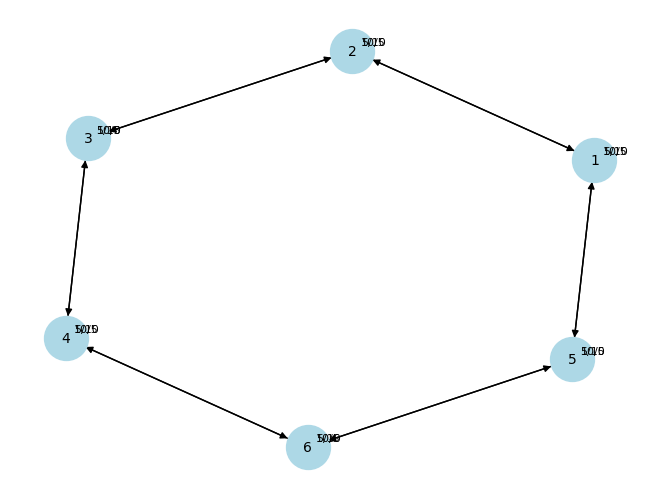

In [ ]:
data = {
    'Location': [1,2,3,1,5,6,2,3,4,5,6,4],
    'Adjacent_Location': [2,3,4,5,6,4,1,2,3,1,5,6],
    'Distance': [10, 10, 10, 5, 5, 5,5, 5, 5, 10, 10, 10]
}

# Create a directed graph
H = nx.DiGraph()

# Add nodes from the 'Location' column
H.add_nodes_from(data['Location'])

# Add edges with weights from the 'Distance' column
for i in range(len(data['Location'])):
    source = data['Location'][i]
    target = data['Adjacent_Location'][i]
    weight = data['Distance'][i]
    H.add_edge(source, target, weight=weight)

# Define positions for nodes
pos = nx.spring_layout(H)

# Draw nodes with labels
nx.draw(H, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')

# Manually plot edge labels for both directions
for edge in H.edges():
    weight_forward = H.get_edge_data(*edge)['weight']
    weight_backward = H.get_edge_data(edge[1], edge[0])['weight']
    label = f"{weight_forward}/{weight_backward}"
    x, y = pos[edge[0]]
    plt.text(x + 0.03, y + 0.03, label, fontsize=8)

plt.show()


In [ ]:
print(nx.shortest_path(G, source=4, target=1, weight='weight'))

NetworkXNoPath: No path between 4 and 1.

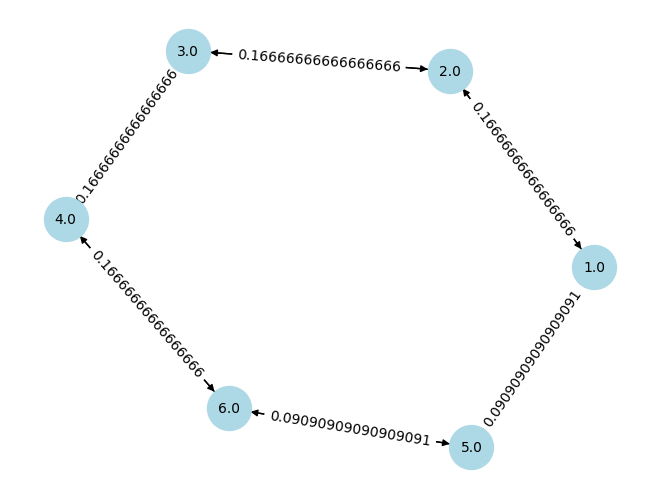

In [ ]:
H = nx.DiGraph()

for _, row in df2.iterrows():
    H.add_edge(row['Location'], row['Adjacent_Location'], weight=row['dist_inv'])


import matplotlib.pyplot as plt

pos = nx.spring_layout(H)  # positions for all nodes

nx.draw(H, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=labels)


plt.show()

In [ ]:
df2

,Location,Adjacent_Location,Distance,dist_inv
0,1,2,10,0.090909
1,2,3,10,0.090909
2,3,4,10,0.090909
3,1,5,5,0.166667
4,5,6,5,0.166667
5,6,4,5,0.166667
6,2,1,5,0.166667
7,3,2,5,0.166667
8,4,3,5,0.166667
9,5,1,10,0.090909


In [ ]:
H = nx.DiGraph()

for _, row in df2.iterrows():
    H.add_edge(row['Location'], row['Adjacent_Location'], weight=row['Distance'])

print(nx.shortest_path(H, source=1, target=4, weight='weight'))
print(nx.shortest_path(H, source=4, target=1, weight='weight'))


[1, 5.0, 6.0, 4]
[4, 3.0, 2.0, 1]


In [ ]:
H = nx.DiGraph()

for _, row in df2.iterrows():
    H.add_edge(row['Location'], row['Adjacent_Location'], weight=row['dist_inv'])

print(nx.shortest_path(H, source=1, target=4, weight='weight'))
print(nx.shortest_path(H, source=4, target=1, weight='weight'))

[1, 2.0, 3.0, 4]
[4, 6.0, 5.0, 1]


Okay, this seems to work bidirectionally with different weights in each direction. Not sure why it wouldn't work above.